In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

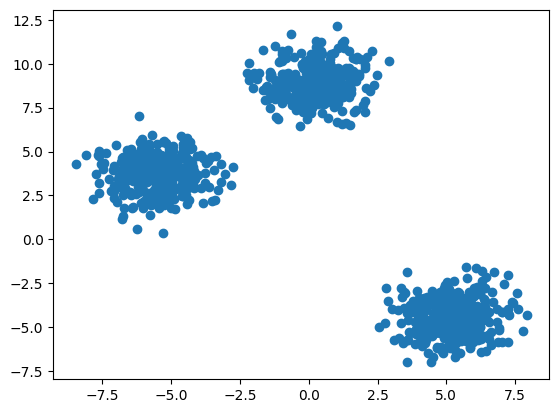

In [7]:
plt.scatter(X[:,0],X[:,-1])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.33,random_state=42
)

In [11]:
from sklearn.cluster import KMeans

In [14]:
# Mannual Process
# Elbow method to select the k value


wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [15]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 1071.7463488940448,
 856.473303506064,
 768.5381313645171,
 687.2412740746948,
 577.8694044494713,
 554.2881881775478]

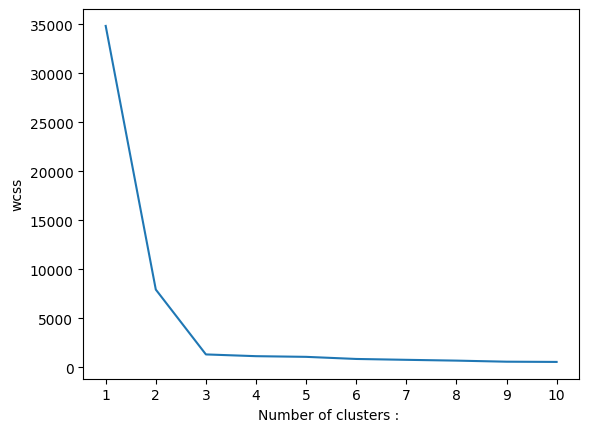

In [16]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters : ")
plt.ylabel("wcss")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [19]:
y_labels = kmeans.fit_predict(X_train)

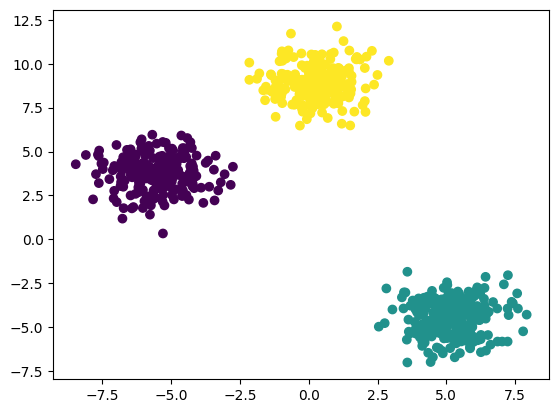

In [22]:
plt.scatter(X_train[:,0],X_train[:,-1],c=y_labels)

In [24]:
y_test_labels = kmeans.predict(X_test)

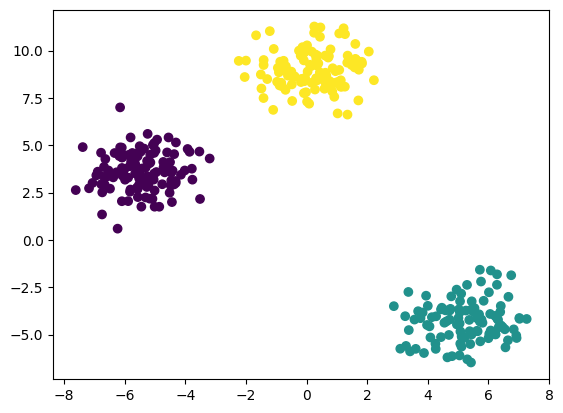

In [25]:
plt.scatter(X_test[:,0],X_test[:,-1],c=y_test_labels)

In [27]:
!pip install kneed

In [28]:
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [32]:
## Performance metrices
## silhoutte score

from sklearn.metrics import silhouette_score

In [33]:
silhoette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhoette_coefficients.append(score)

In [34]:
silhoette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4853108121488639,
 0.4686395574881294,
 0.3425105292800712,
 0.33520078715640617,
 0.32757776724841364,
 0.32865014368295964]

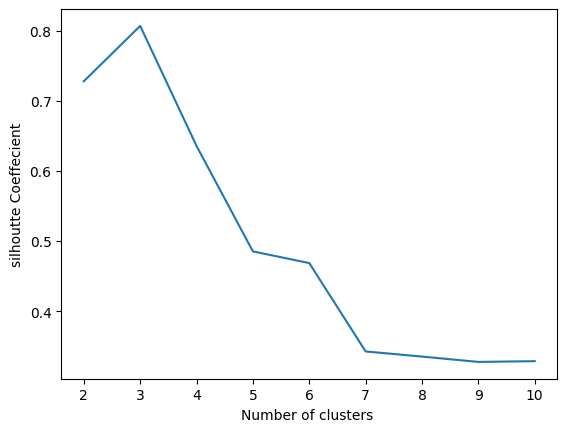

In [36]:
## plotting silhouette score
plt.plot(range(2,11),silhoette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters ")
plt.ylabel("silhoutte Coeffecient")
plt.show()